# 1. Historia

Las técnicas estadísticas son herramientas que permiten responder preguntas sobre posibles patrones en los datos empíricos. No es sorprendente, entonces, que muchas técnicas importantes de análisis estadístico fueran desarrolladas por científicos interesados ​​en responder preguntas empíricas muy específicas. Así sucedió con el análisis de regresión. La historia de esta técnica estadística en particular se remonta a la Inglaterra de fines del siglo XIX y las actividades del científico Francis Galton. Galton nació en una familia adinerada de genios; él y Charles Darwin eran primos hermanos. Durante su vida, Galton estudió de todo, desde la clasificación de huellas dactilares hasta la meteorología, pero obtuvo un amplio reconocimiento principalmente por su trabajo sobre la herencia. Su idea más importante se le ocurrió mientras estudiaba la herencia de una de las características humanas: la altura. Para comprender cómo se transmitía la característica de la altura de una generación a la siguiente, Galton recopiló datos sobre la altura de los individuos y la altura de sus padres. Después de construir tablas de frecuencia que clasificaban a estos individuos tanto por su estatura como por la estatura promedio de sus padres, Galton llegó a la conclusión ordinaria de que las personas altas generalmente tenían padres altos y las personas bajas generalmente tenían padres bajos.

Galton publicó su análisis de sus datos en el artículo de 1886 "Regression Towards Mediocrity in Hereditary Stature". Ahora nos referimos a este fenómeno que Galton descubrió como regresión a la media.

La "regresión" se asoció con el método de predicción por mínimos cuadrados a finales del siglo XIX. Karl Pearson, uno de los fundadores de la estadística matemática y un colega de Galton, notó que si graficaba la altura de los padres en el eje x y de sus hijos en el eje y, la línea que mejor se ajustaba a los datos de acuerdo con los mínimos cuadrados tenía una pendiente de menos de uno. Una pendiente de menos de uno es esencialmente la representación matemática de la "regresión a la media". Pearson se refirió a esta pendiente en un gráfico como la "línea de regresión". Y así, el método de mínimos cuadrados y regresión se convirtió en algo sinónimo

El análisis de regresión tal como lo conocemos hoy en día es principalmente el trabajo de R.A. Fisher, uno de los estadísticos más reconocidos del siglo XX. Fisher combinó el trabajo de Gauss y Pearson para desarrollar una teoría completa de las propiedades de la estimación por mínimos cuadrados. Debido al trabajo de Fisher, el análisis de regresión no solo se usa para predecir y comprender correlaciones, sino también para inferencias sobre la relación entre un factor y un resultado. Después de Fisher, ha habido una variedad de importantes extensiones de regresión, incluida la regresión logística, la regresión no paramétrica, la regresión bayesiana y la regresión que incorpora la regularización.


[Fuente](https://journals.sagepub.com/doi/pdf/10.1068/a300203)

![Fisher](https://www.researchgate.net/profile/Fabian-Pedregosa/publication/278826818/figure/fig6/AS:614336141746180@1523480558705/Sir-R-A-Fisher-London-England-1908-Adelaide-Australia-1962-made-important.png)

$$Fisher$$

[Fuente](http://famestatisticians.blogspot.com/2012/03/10-most-famous-statisticians.html)



# 2. Planteamiento del Algoritmo



El objetivo de la regresión (desde un enfoque de Machine Learning) es construir un sistema que pueda tomar un vector $x\ \epsilon\ R^n $ como input y predecir el valor de un escalar  $y\ \epsilon \ R$ como output. El output de la regresión lineal es una función lineal del input. Sea $\hat{y}$ el valor que el modelo pronostica para $y$. Se define el output de la siguiente forma: $$\hat{y}= w^Tx+b,$$
donde $w\ \epsilon\ R^n$ es el vector de parámetros. Se puede considerar el conjunto de parámetros $w$ como el conjunto de pesos (**weights**) que determinan cómo las variables (**features**) afectan los pronósticos. 

Una función de pérdida (**loss function**) cuantifica la distancia entre el valor pronsticado y observado de la variable objetivo. La función de pérdida más popular en los problemas de regresión es el **error cuadrático medio**. Cuando la predicción para una instancia particulai $i$ es $\hat{y_i}$ y el valor observado es $y_i$, entonces el error cuadrado es: $$ l(w,b,x)=\frac{1}{m}\sum_i(\hat{y}^{(i)}-y^{(i)})^2$$
Cuando el modelo se entrena, se quieren encontrar los parámetros $w^*$  que minimiza la pérdida total a través de todas las instancias de entrenamiento. El entrenamiento consiste en reducir iterativamente el error actualizando los parámetros en la dirección que incrementalmente disminuye la función de pérdida. Este algoritmo se llama **gradiente descendiente**. La aplicación "de juguete" de este algoritmo consiste en tomar la derivada de la función de pérdida, pero en problemas reales esto puede ser muy lento porque el algoritmo debe recorrer la base entera antes de hacer una actualización. Por eso un algoritmo más realista consiste en tomar una muestra aleatoria de un minibatch de instancias cada vez que se requiere actualizar los parámetros. Esta variante se llama **minibatch stochastic gradient descent.** En cada iteración, se selecciona al azar un minibatch $B$ que consta de un número fijo de ejemplos de entrenamiento. Luego se calcula la derivada (gradiente) de la pérdida promedio en el minibatch con respecto a los parámetros del modelo. Finalmente, se multiplica el gradiente por un valor positivo predeterminado $\eta$ y se resta el término resultante de los valores de los parámetros actuales. $$(w,b)←(w,b)−\frac{\eta}{|B|}\sum_{i\ \epsilon\ B} \delta_{(w,b)}l^{(i)}(w,b).$$

$w$ y $x$ son vectores. La cardinalidad del conjunto $|B|$ representa el número de ejemplos en cada minibatch (el tamaño del lote) y $\eta$ denota la tasa de aprendizaje. Después de entrenar para un número predeterminado de iteraciones (o hasta que se cumplan otros criterios de detención), se encuentran los parámetros estimados del modelo, denominados $\hat{w}\ y\ \hat{b}.$

# 3. Ejemplo Regresión

Usamos la base de muestra: california_housing_train.csv. Contiene los precios de la vivienda en la zona de California y un conjunto de covariables asociadas. Se encuentra en los Sample Data que trae Python por defecto.

In [1]:
#Se importan la librerias a utilizar
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [4]:
#Verifico la información contenida en el dataset
print('Información en el dataset:')
print(data.keys())

Información en el dataset:
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [5]:
#Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(data.shape)

Cantidad de datos:
(17000, 9)


In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data))

In [7]:
#Seleccionamos solamente las columnas de interés del dataset. Lo volvemos un array
X = data.iloc[:,2:8].to_numpy()

In [8]:
#Defino los datos correspondientes a las etiquetas. Lo volvemos un array
y = data.iloc[:,8].to_numpy()


## 3.1 Primer Ejercicio: Gradiente Descendiente Simple from Scratch

Adecuamos el código utilizado durante la clase para regresión multivariada

In [132]:
from __future__ import print_function
import jax.numpy as np # autograd para windows
import numpy as onp
import matplotlib.pyplot as plt
from jax import grad,jit
import pandas as pd

In [133]:
def linreg(w, b, X):  
    """The linear regression model."""
    return np.dot(X, w) + b

In [134]:
def loss(w,b,X,y):
    #return ((np.array([y]).T-linreg(X, w, b))**2).mean()  
    #return ((y.reshape((-1, 1))-linreg(X, w, b))**2).mean()/ 2
    return ((y.reshape((-1, 1))-linreg(w, b, X))**2).mean()
## Diferenciación Automática
grad_loss=jit(grad(loss,argnums=(0,1)))

In [135]:
def optimize(w,b,X,y,h=0.03):
    
    # Calcular Derivada
    w_grad,b_grad=grad_loss(w,b,X,y)
    
    # Gradiente Descendiente
    w-=w_grad*h
    b-=b_grad*h
    
    # Regresar Nuevos parámetros
    return w,b

In [136]:
## Initial Guess
w = onp.random.normal(0, 0.01, (6, 1))
b = onp.zeros(1)

# Acumular resultados
W0,B1=[],[]
train_loss=[]
# Número de veces que se cambian los parámetros
epochs=300

# Tasa de Aprendizaje
lr=0.01

print("Perdidas:\n")

for epoch in range(epochs):
    
    w,b=optimize(w,b,X,y,lr)
    
    W0.append(w)
    B1.append(b)
    
    losss=loss(w,b,X,y)
    
    train_loss.append(losss)
    if epoch%10==0:
        print(f"Iteración {epoch}: {losss}")

Perdidas:

Iteración 0: 0.2025655210018158
Iteración 10: 0.1387721449136734
Iteración 20: 0.10224409401416779
Iteración 30: 0.0812949612736702
Iteración 40: 0.06924762576818466
Iteración 50: 0.062287043780088425
Iteración 60: 0.05823351442813873
Iteración 70: 0.05584156885743141
Iteración 80: 0.05439961701631546
Iteración 90: 0.05350108444690704
Iteración 100: 0.052913643419742584
Iteración 110: 0.05250459909439087
Iteración 120: 0.05219804868102074
Iteración 130: 0.05195067822933197
Iteración 140: 0.051737718284130096
Iteración 150: 0.05154499411582947
Iteración 160: 0.05136440694332123
Iteración 170: 0.05119134485721588
Iteración 180: 0.051023148000240326
Iteración 190: 0.050858285278081894
Iteración 200: 0.05069586634635925
Iteración 210: 0.0505354218184948
Iteración 220: 0.05037663131952286
Iteración 230: 0.05021931976079941
Iteración 240: 0.05006340891122818
Iteración 250: 0.04990878701210022
Iteración 260: 0.04975545033812523
Iteración 270: 0.04960334300994873
Iteración 280: 0.04

In [137]:
print(W0[-1])
print(B1[-1])

[[0.14916888]
 [0.03432504]
 [0.04526734]
 [0.01930829]
 [0.02388871]
 [0.17196749]]
[0.26954347]


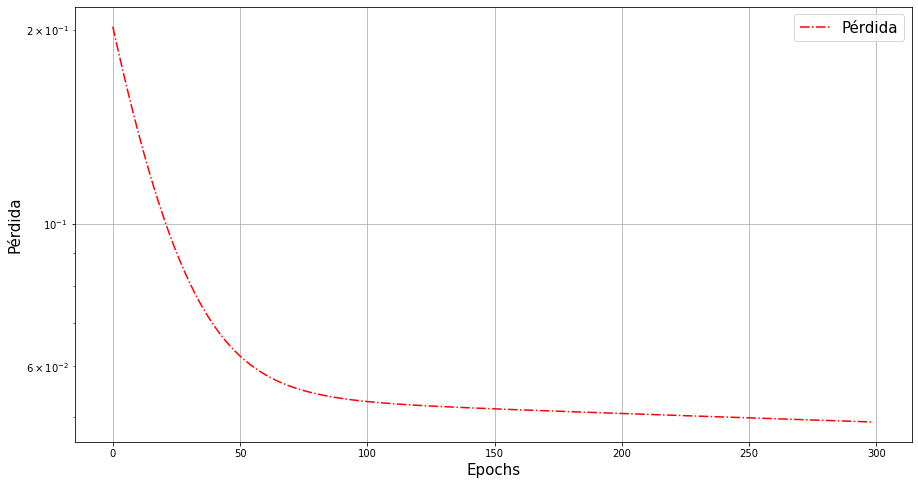

In [138]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.semilogy(range(epochs),train_loss,'r-.')
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Pérdida",fontsize=15)
plt.legend(["Pérdida"],fontsize=15)
plt.grid()
plt.show()

## 3.2 Segundo Ejercicio: Gradiente Descendiente Estocástico from Scratch

Adecuamos el código utilizado durante la clase para incorporar los minibatch samples.

In [139]:
## Initial Guess
w = onp.random.normal(0, 0.01, (6, 1))
b = onp.zeros(1)
batch_size = 128
# Acumular resultados
W0,B1=[],[]
train_loss=[]
# Número de veces que se cambian los parámetros
epochs=300

# Tasa de Aprendizaje
lr=0.01

print("Perdidas:\n")

for epoch in range(epochs):

    indexes = onp.random.randint(0, len(X), batch_size) # random sample
    Xs = np.take(X, indexes, axis=0)
    ys = np.take(y, indexes,axis=0)
    
    w,b=optimize(w,b,Xs,ys,lr)
    
    W0.append(w)
    B1.append(b)
    
    losss=loss(w,b,X,y)
    
    train_loss.append(losss)
    if epoch%128==0:
        print(f"Iteración {epoch}: {losss}")

Perdidas:

Iteración 0: 0.21289025247097015
Iteración 128: 0.050965774804353714
Iteración 256: 0.04889481142163277


In [140]:
print(W0[-1])
print(B1[-1])

[[0.13249685]
 [0.04801431]
 [0.01681442]
 [0.0061599 ]
 [0.02192763]
 [0.19463919]]
[0.27634996]


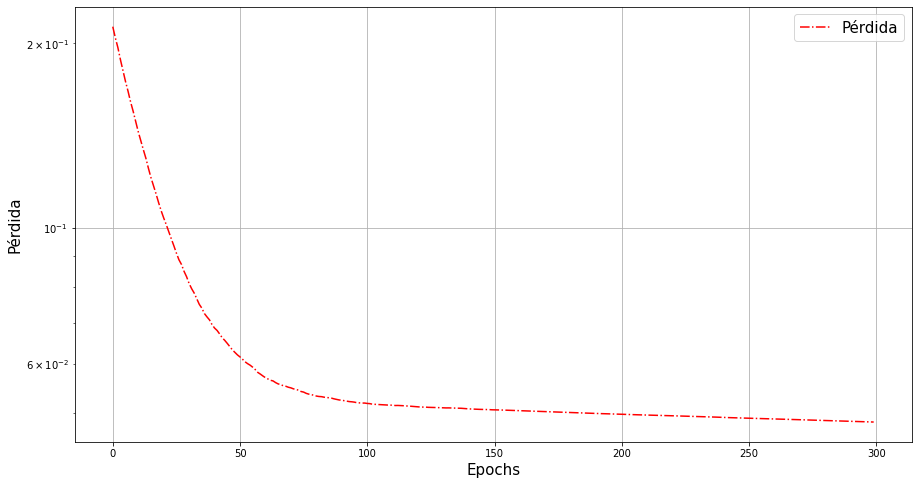

In [141]:
%matplotlib inline
plt.figure(figsize=(15,8))
plt.semilogy(range(epochs),train_loss,'r-.')
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Pérdida",fontsize=15)
plt.legend(["Pérdida"],fontsize=15)
plt.grid()
plt.show()

# 4. Conclusión

Se realizó la implementación manual de 2 métodos de optimización clásicos para una data de prueba sencilla. Se comprueba la mayor eficiencia del método SGD, aunque en ejercicios de "juguete" como estos, las diferencias no son muy significativas.